In [11]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42) # randomstate를 42로 고정한 객체를 만들어준다
# ▶ Generating training data 
X_train = 0.2 * rng.randn(1000, 2) # 2차원 데이터 1000개
X_train = np.r_[X_train + 3, X_train] # r_ : 데이터를 row 단위로 합쳐준다.
X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])

# ▶ Generating new, 'normal' observation
X_test = 0.2 * rng.randn(200, 2)
X_test = np.r_[X_test + 3, X_test]
X_test = pd.DataFrame(X_test, columns = ['x1', 'x2'])

# ▶ Generating outliers
X_outliers = rng.uniform(low=-1, high=5, size=(50, 2))
X_outliers = pd.DataFrame(X_outliers, columns = ['x1', 'x2'])

print(X_train.shape)
print(X_test.shape)
print(X_outliers.shape)

(2000, 2)
(400, 2)
(50, 2)


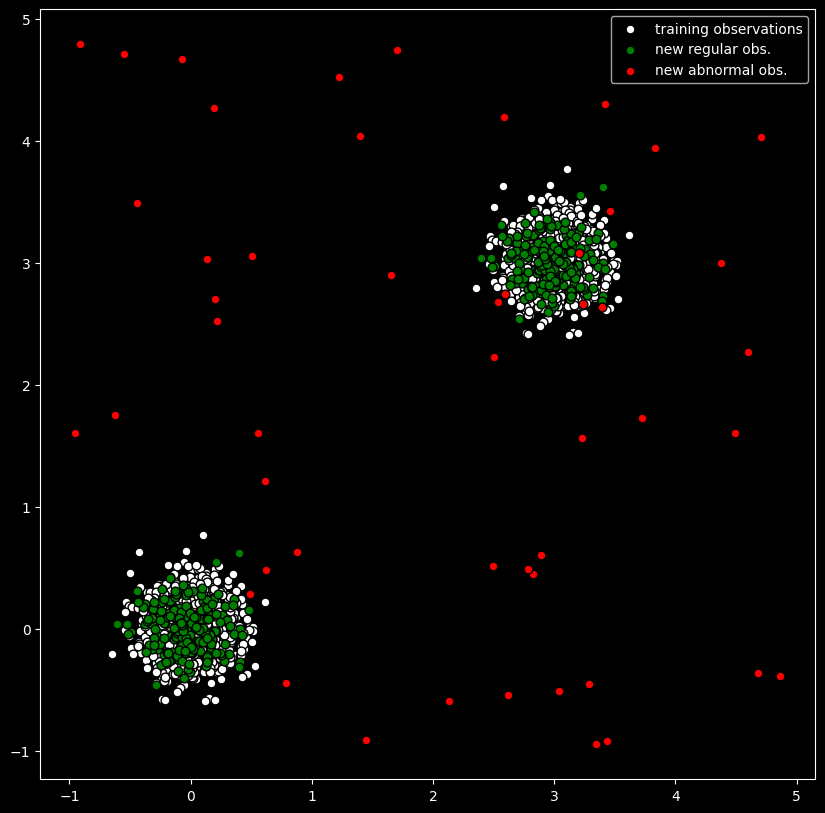

In [10]:
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
plt.rcParams['figure.figsize'] = [10, 10]

# ▶ Train set
p1 = plt.scatter(X_train.x1, X_train.x2, c='white', s=20*2, edgecolor='k', label='training observations')

# ▶ Test set, 정상 Sample로 구성
p2 = plt.scatter(X_test.x1, X_test.x2, c='green', s=20*2, edgecolor='k', label='new regular obs.')

# ▶ Outlier set
p3 = plt.scatter(X_outliers.x1, X_outliers.x2, c='red', s=20*2, edgecolor='k', label='new abnormal obs.')

plt.legend()
# plt.gcf().set_size_inches(5, 5)

In [3]:
# ▶ Model 학습 및 예측
# - n_estimators : 나무의 개수 (※ default 100)
# - max_samples : 샘플링 데이터 개수 (※ 정수, 실수(0~1), 전체 데이터 개수 or 256 중 작은 수)
# - contamination : 전체 데이터에서 이상치의 비율, 이 비율에 따라 이상치로 판단하기 위한 score의 threshold를 정의
# - max_features : 학습 시 사용할 Feature (※ default 1, 모두 사용)

clf = IsolationForest(max_samples=100, contamination = 0.05, random_state=42)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [4]:
# ▶ -1 : Outlier / 1 : Normal
print(y_pred_train)
print(y_pred_test)
print(y_pred_outliers)

[1 1 1 ... 1 1 1]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1

In [15]:
# ▶ Score, 점수가 낮을 수록 Outlier, 음수
clf.decision_function(X_outliers)

array([-0.07397915, -0.10344893, -0.06839828,  0.00754778, -0.02594477,
       -0.10344893, -0.03858639,  0.02753773, -0.06375707, -0.06988794,
       -0.09467105, -0.07814982, -0.08015771, -0.04450317,  0.12127897,
       -0.08251879, -0.0615171 , -0.0839109 , -0.08435337, -0.01324472,
       -0.09467105, -0.08594633, -0.09647411, -0.09101499, -0.0648407 ,
       -0.08185362, -0.0200524 , -0.03235862, -0.06813104, -0.07117076,
       -0.09423924, -0.02588178, -0.05521445, -0.08650631, -0.03681947,
       -0.04963059, -0.09951997, -0.09951997, -0.08342488, -0.03517144,
       -0.06276045, -0.08643544, -0.08145166, -0.05683871, -0.06592612,
       -0.00561074, -0.08398277, -0.03698318, -0.02039574,  0.00107149])

In [6]:
# ▶ Score, 높을 수록 Nomral(Inlier), 양수
clf.decision_function(X_test)[0:5]

array([0.13520326, 0.12503499, 0.04709557, 0.14023926, 0.11374595])

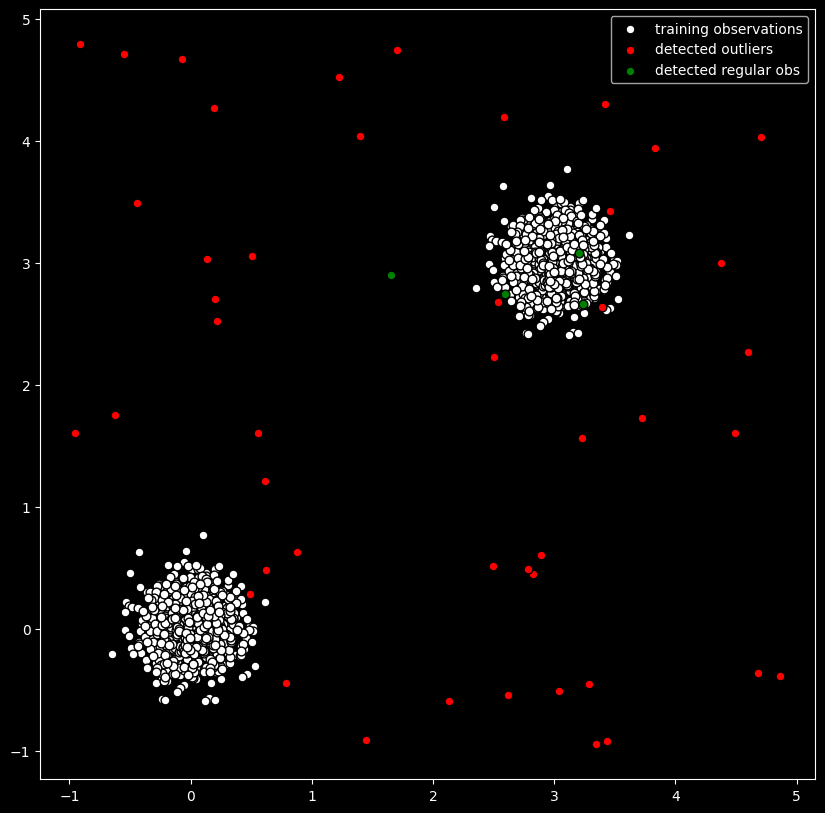

In [7]:
# ▶ Outlier Label 할당
X_outliers = X_outliers.assign(y = y_pred_outliers)

p1 = plt.scatter(X_train.x1, X_train.x2, c='white',
                 s=20*2, edgecolor='k', label="training observations")

p2 = plt.scatter(X_outliers.loc[X_outliers.y == -1, ['x1']], 
                 X_outliers.loc[X_outliers.y == -1, ['x2']], 
                 c='red', s=20*2, edgecolor='k', label="detected outliers")

p3 = plt.scatter(X_outliers.loc[X_outliers.y == 1, ['x1']], 
                 X_outliers.loc[X_outliers.y == 1, ['x2']], 
                 c='green', s=20*2, edgecolor='k', label="detected regular obs")
plt.legend()
plt.gcf().set_size_inches(10, 10)

In [8]:
# ▶ 정상 data set을 얼만큼 정상으로 예측하였는지?
print("테스트 데이터셋에서 정확도:", list(y_pred_test).count(1)/y_pred_test.shape[0])

# ▶ Outlier data set을 얼마나 Outlier로 예측하였는지?
print("이상치 데이터셋에서 정확도:", list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0])

테스트 데이터셋에서 정확도: 0.96
이상치 데이터셋에서 정확도: 0.92
